In [1]:
#hubungkan google colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Library

In [2]:
import numpy as np 
import pandas as pd 
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from IPython.display import Image

## Make Directories

In [3]:
# Membuat direktori untuk data train dan data validation
base_dir = '/content/drive/MyDrive/FinalProject_AI/archive.zip (Unzipped Files)'
train_dir = os.path.join(base_dir, 'Training')
val_dir = os.path.join(base_dir, 'Testing')

In [4]:
# Menampilkan list direktori dari data train
directories = os.listdir(train_dir)
print(directories)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [5]:
# Menampilkan list direktori dari data testing
directories = os.listdir(val_dir)
print(directories)

['glioma', 'meningioma', 'notumor', 'pituitary']


## Visualization Data

In [6]:
import plotly.express as px
classes_info = {}
classes = sorted(os.listdir(train_dir))
for name in classes:
    classes_info[name] = len(os.listdir(train_dir + f'/{name}'))
print(classes_info)
fig = px.pie(names=classes_info.keys(),values=classes_info.values(),hole=0.05,title='CLasses Info')
fig.update_layout({'title':{"x":0.1}})
fig.show()

{'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}


## Preprocessing with Image Augmentation

In [7]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop ,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Activation

In [8]:
train_data_gen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    rotation_range=2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True)

In [9]:
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [10]:
training_set = train_data_gen.flow_from_directory(directory="/content/drive/MyDrive/FinalProject_AI/archive.zip (Unzipped Files)/Training",
                                                  target_size=(150,150),
                                                  class_mode='categorical',
                                                  batch_size=32)

Found 5712 images belonging to 4 classes.


In [11]:
validation_set = validation_data_gen.flow_from_directory(directory="/content/drive/MyDrive/FinalProject_AI/archive.zip (Unzipped Files)/Testing",
                                                        target_size=(150,150),
                                                        class_mode='categorical',
                                                        batch_size=32)

Found 1311 images belonging to 4 classes.


## Make a Model

In [12]:
# Menggunakan sequential, karena sequential konsisten terhadap lapisan urutan
model1=Sequential()

In [13]:
# Menambahkan Convolutional layer
# Mengaplikasikan 32 filters ke setiap image
# Menggunakan 5x5 matriks
model1.add(Conv2D(filters=32,kernel_size=5,input_shape=(150,150,3)))

In [14]:
# Menggunakan ReLu, karena lebih cepat sehingga dipercaya fungsi ini lebih baik dari fungsi lainnya. 
model1.add(Activation('relu'))

In [15]:
# Menambahkan convolutional layer kedua
model1.add(Conv2D(filters=32,kernel_size=4))

In [16]:
model1.add(Activation('relu'))

In [17]:
# Menambahkan layer pertama MaxPool2D, berfungsi untuk mengurangi dimensi spasial input.
# pool_size 3, berarti ukuran matriks area
model1.add(MaxPool2D(pool_size=3))

In [18]:
# Menambahkan convolutional layer ketiga
model1.add(Conv2D(filters=25,kernel_size=3))

In [19]:
model1.add(Activation('relu'))

In [20]:
# Menambahkan convolutional layer keempat
model1.add(Conv2D(filters=25,kernel_size=2))

In [21]:
model1.add(Activation('relu'))

In [22]:
# Menambahkan layer kedua MaxPool2D
model1.add(MaxPool2D(pool_size=3))

In [23]:
#flatten layer, berfungsi mengubah dimensi input menjadi bentuk linear.
model1.add(Flatten())
#Deeeper hidden layer, berfungsi untuk menjembatani lapisan input dan output.
model1.add(Dense(250))
model1.add(Activation('relu'))
#output layer, berfungsi untuk menghasilkan prediksi kelas untuk data input.
model1.add(Dense(4))
model1.add(Activation('sigmoid'))

In [24]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 32)      2432      
                                                                 
 activation (Activation)     (None, 146, 146, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 143, 143, 32)      16416     
                                                                 
 activation_1 (Activation)   (None, 143, 143, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 25)        7225      
                                                        

In [25]:
# Menggunakan categorical crossentropy, karena brain tumor termasuk ke dalam multiclassification
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
# Menggunakan callbacks
from keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [28]:
model_history = model1.fit(x=training_set,validation_data=validation_set,epochs=3,batch_size=128,callbacks=[early_stop])

Epoch 1/3
179/179 [==============================] - 778s 4s/step - loss: 0.5035 - accuracy: 0.8013 - val_loss: 0.5432 - val_accuracy: 0.7818
Epoch 2/3
179/179 [==============================] - 787s 4s/step - loss: 0.4375 - accuracy: 0.8274 - val_loss: 0.4914 - val_accuracy: 0.8169
Epoch 3/3
179/179 [==============================] - 777s 4s/step - loss: 0.4119 - accuracy: 0.8405 - val_loss: 0.4308 - val_accuracy: 0.8322


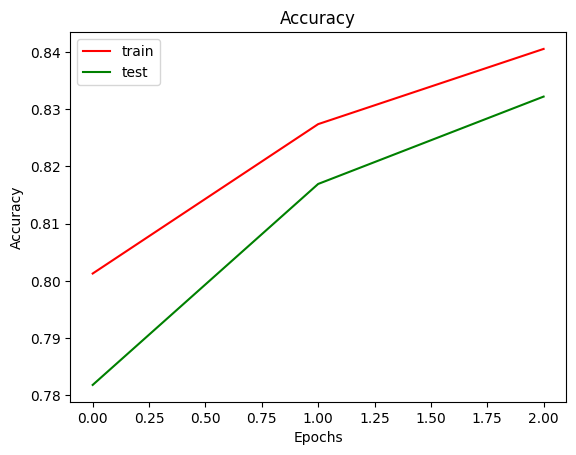

In [29]:
plt.plot(model_history.history["accuracy"],c = "red")
plt.plot(model_history.history["val_accuracy"],c = "green")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()